In [20]:
import os 
import sys

import numpy as np

import torch
import re

import matplotlib.pyplot as plt

sys.path.append(os.getcwd())
sys.path.insert(0, "../porousequivariantnetworks/code/")
sys.path.insert(0, "../porousequivariantnetworks/")

from models import equivariant_mpnn

from utils.ZeoliteData import get_zeolite, get_data_pore, get_data_graph, get_data_megnet
from utils.dataloading import get_data, get_graph_data

In [2]:
data = get_zeolite('MOR')

ref = data['ref'] # reflections
tra = data['tra'] # translations
l = data['l'] # scale of the unit cell

# specific for MOR
_, _, X, A, d, X_pore, A_pore, d_pore, pore = get_data(l)

edges, idx1, idx2, idx2_oh = get_graph_data(A, d)


In [3]:
edges_sp, idx1_sp, idx2_sp, idx2_oh_sp = get_graph_data(A_pore, d_pore)
edges_ps, idx1_ps, idx2_ps, idx2_oh_ps = get_graph_data(A_pore.T, d_pore.T)


In [39]:
def get_ats(idx):
    with open(f'Data_isotherms/isomors/MOR_{idx}.cif') as f:
        lines = f.readlines()
    lines = [i.strip().split() for i in lines]
    lines = [i for i in lines if len(i)>1]


    at_pos = [i[1:5] for i in lines if i[1] in ['Si', 'Al']]
    atom = [1 if i[0]=='Al' else 0 for i in at_pos]
    return atom

def get_iso(idx):
    with open(f'Data_isotherms/curves/plot_data_{idx}') as f:
        lines = f.read()
        p = re.findall(r'p\[(?:[1-6])\]=(-?\d+(?:\.\d+)?)', lines)

    p = [float(i) for i in p]
    return p

In [32]:
lines = get_iso(11)

In [38]:
re.findall(r'p\[(?:[1-6])\]=(-?\d+(?:\.\d+)?)', lines)

['2.94833', '0.00107667', '0.525952', '0.674335', '3.25413', '1.24765']

In [29]:
for line in lines:
    print(re.findall('\Ap\[[1-6]\]', line))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['p[1]']
['p[2]']
['p[3]']
['p[4]']
['p[5]']
['p[6]']
[]
[]
[]
[]
[]
['p[1]']
[]


In [19]:
lines = [i for i in lines if i.startswith('p')]
lines

['p[1]=2.94833\n',
 'p[2]=0.00107667\n',
 'p[3]=0.525952\n',
 'p[4]=0.674335\n',
 'p[5]=3.25413e-05\n',
 'p[6]=1.24765\n',
 'p[7]=-0.2158\n',
 'p[8]=2.53221\n',
 'p[9]=-2.24196\n',
 'plot \\\n',
 "p[1]*p[2]*x**p[3]/(1.0+p[2]*x**p[3])+p[4]*p[5]*x**p[6]/(1.0+p[5]*x**p[6]) title 'fit f(x)' with li lw 2,\\\n"]

In [6]:
n = 989

atoms = np.zeros((n, 48))
iso_params = np.zeros((n, 6))


for zeo in range(n):

    atoms[zeo] = get_ats(zeo)
    

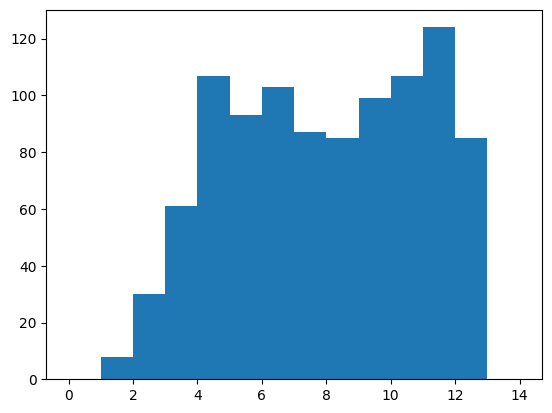

In [11]:
plt.hist(atoms.sum(1), bins=np.arange(0, 15));